In [1]:
import ibmos2spark
import pandas as pd
import seaborn as sns
from pyspark.sql import SQLContext
import matplotlib.pyplot as plt
from pyspark.sql.functions import col

# @hidden_cell
credentials = {
    'auth_url': 'https://identity.open.softlayer.com',
    'project_id': 'eaad5b904c0b410090057296f74a8784',
    'region': 'dallas',
    'user_id': '00c1437f11ad4e749e5f37df3fbc8ab9',
    'username': 'member_3144209d6fbaea80f34b8f375a1a147239ad7e35',
    'password': 'SK}b3(PaYbp2pq3,'
}

configuration_name = 'os_f34eb69ce46f45f6bb1d81aa6fd77e13_configs'
bmos = ibmos2spark.bluemix(sc, credentials, configuration_name)

from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()
df_data_2 = spark.read\
  .format('org.apache.spark.sql.execution.datasources.csv.CSVFileFormat')\
  .option('header', 'true')\
  .load(bmos.url('DefaultProjectarpitasahasjsuedu', 'thads2013m.csv'))
df_data_2.take(5)



[Row(Control=u'54288', SMSA=u'5000', METRO=u'7', BEDRMS=u'4', BUILT=u'2003', STATUS=u'1', TYPE=u'1', VALUE=u'90000', VACANCY=u'-6', TENURE=u'1', NUNITS=u'1', ROOMS=u'8', WGTMETRO=u'873.5319936', PER=u'5', ZINC2=u'53008', ZADEQ=u'1', ZSMHC=u'1906', AGE1=u'66', STRUCTURETYPE=u'1', OWNRENT=u'1', UTILITY=u'334.6666667', OTHERCOST=u'688.3333333', COST06=u'1621.135925', COST12=u'1968.676204', COST08=u'1729.849305', COSTMED=u'1545.915101', TOTSAL=u'37000', ASSISTED=u'-9', IPOV=u'29398', LMED=u'49000', L50=u'35316', L80=u'56484', FMR=u'1799', GLMED=u'49000', GL30=u'-9', L30=u'-9', GL50=u'35316', GL80=u'56484', APLMED=u'52920', ABL30=u'-9', ABL50=u'37932', ABL80=u'60668', ABLMED=u'56840', BURDEN=u'0.43148204', INCRELAMIPCT=u'100.1662887', INCRELAMICAT=u'4', INCRELPOVPCT=u'180.3115858', INCRELPOVCAT=u'3', INCRELFMRPCT=u'73.66314619', INCRELFMRCAT=u'2', COST06RELAMIPCT=u'114.0841608', COST06RELAMICAT=u'6', COST06RELPOVPCT=u'220.5777162', COST06RELPOVCAT=u'4', COST06RELFMRPCT=u'90.11316984', COST0

In [2]:

# The FMTCOST06RELAMCAT contains the cost of the house at 6 % interest relative to the Average Median Income (AMI). 
df_data = df_data_2.select("FMTCOST06RELAMICAT", "SMSA", "AGE1")

#The column is split since a numerical category and string with the percent AMI are in the same column in the original data. 
split_col = pyspark.sql.functions.split(df_data_2['FMTCOST06RELAMICAT'], ' ')

df_data = df_data.withColumn('Income_Cat', split_col.getItem(0))

str = df_data_2['FMTCOST06RELAMICAT']
substring = pyspark.sql.functions.substring(str, 2, 100)

df_data = df_data.withColumn('Percent_of_AMI', substring)


df_data.show()



+------------------+----+----+----------+---------------+
|FMTCOST06RELAMICAT|SMSA|AGE1|Income_Cat| Percent_of_AMI|
+------------------+----+----+----------+---------------+
|  6 100 - 120% AMI|5000|  66|         6| 100 - 120% AMI|
|    4 60 - 80% AMI|5000|  39|         4|   60 - 80% AMI|
|      7 120% AMI +|5000|  44|         7|     120% AMI +|
|      7 120% AMI +|5000|  39|         7|     120% AMI +|
|      7 120% AMI +|5000|  40|         7|     120% AMI +|
|    4 60 - 80% AMI|5000|  75|         4|   60 - 80% AMI|
|    4 60 - 80% AMI|5000|  48|         4|   60 - 80% AMI|
|      7 120% AMI +|5000|  -9|         7|     120% AMI +|
|      7 120% AMI +|5000|  -9|         7|     120% AMI +|
|      7 120% AMI +|5000|  53|         7|     120% AMI +|
|      7 120% AMI +|5000|  26|         7|     120% AMI +|
|      7 120% AMI +|5000|  36|         7|     120% AMI +|
|      7 120% AMI +|5000|  61|         7|     120% AMI +|
|      7 120% AMI +|5000|  42|         7|     120% AMI +|
|      7 120% 

In [3]:
# group the data by the SMSA (Standard Metropolitan Statistical Area)
df_data.groupby("SMSA")
df_data.show()

+------------------+----+----+----------+---------------+
|FMTCOST06RELAMICAT|SMSA|AGE1|Income_Cat| Percent_of_AMI|
+------------------+----+----+----------+---------------+
|  6 100 - 120% AMI|5000|  66|         6| 100 - 120% AMI|
|    4 60 - 80% AMI|5000|  39|         4|   60 - 80% AMI|
|      7 120% AMI +|5000|  44|         7|     120% AMI +|
|      7 120% AMI +|5000|  39|         7|     120% AMI +|
|      7 120% AMI +|5000|  40|         7|     120% AMI +|
|    4 60 - 80% AMI|5000|  75|         4|   60 - 80% AMI|
|    4 60 - 80% AMI|5000|  48|         4|   60 - 80% AMI|
|      7 120% AMI +|5000|  -9|         7|     120% AMI +|
|      7 120% AMI +|5000|  -9|         7|     120% AMI +|
|      7 120% AMI +|5000|  53|         7|     120% AMI +|
|      7 120% AMI +|5000|  26|         7|     120% AMI +|
|      7 120% AMI +|5000|  36|         7|     120% AMI +|
|      7 120% AMI +|5000|  61|         7|     120% AMI +|
|      7 120% AMI +|5000|  42|         7|     120% AMI +|
|      7 120% 

In [4]:
#filter the data between the age of 30 and 40
filtered = df_data.where((col('AGE1') >= 30) & (col('AGE1') <= 40))

#map the SMSA codes with city names
filtered_1 = filtered.na.replace(['640', '720', '1120', '3280', '3360', '3600', '4120', '4520', '5000', '5120', '5360', '5880', '5960', '6760', '6840', '7240', '7600', '8280', '8520', '8840'], ['Austin', 'Baltimore', 'Boston', 'Hartford', 'Houston', 
                 'Jacksonville', 'Las Vegas', 'Louisville', 'Miami', 'Minneapolis', 'Nashville','Oklahoma City', 'Orlando' , 'Richmond', 'Rochester', 'San Antonio',                                                                                                                   
                      'Seattle', 'Tampa', 'Tucson', 'Washington DC'], 'SMSA')
    
filtered_1.show()

+------------------+---------+----+----------+---------------+
|FMTCOST06RELAMICAT|     SMSA|AGE1|Income_Cat| Percent_of_AMI|
+------------------+---------+----+----------+---------------+
|    4 60 - 80% AMI|    Miami|  39|         4|   60 - 80% AMI|
|      7 120% AMI +|    Miami|  39|         7|     120% AMI +|
|      7 120% AMI +|    Miami|  40|         7|     120% AMI +|
|      7 120% AMI +|    Miami|  36|         7|     120% AMI +|
|  6 100 - 120% AMI|    Miami|  37|         6| 100 - 120% AMI|
|  6 100 - 120% AMI|    Miami|  33|         6| 100 - 120% AMI|
|  6 100 - 120% AMI|    Miami|  38|         6| 100 - 120% AMI|
|  6 100 - 120% AMI|    Miami|  32|         6| 100 - 120% AMI|
|      7 120% AMI +|    Miami|  35|         7|     120% AMI +|
|    4 60 - 80% AMI|    Miami|  36|         4|   60 - 80% AMI|
|      7 120% AMI +|    Miami|  39|         7|     120% AMI +|
|      7 120% AMI +|    Miami|  31|         7|     120% AMI +|
|   5 80 - 100% AMI|Baltimore|  40|         5|  80 - 10

In [5]:
# convert to Pandas
df2 = filtered_1.toPandas()
df2.head()

,FMTCOST06RELAMICAT,SMSA,AGE1,Income_Cat,Percent_of_AMI
0,4 60 - 80% AMI,Miami,39,4,60 - 80% AMI
1,7 120% AMI +,Miami,39,7,120% AMI +
2,7 120% AMI +,Miami,40,7,120% AMI +
3,7 120% AMI +,Miami,36,7,120% AMI +
4,6 100 - 120% AMI,Miami,37,6,100 - 120% AMI


/usr/local/src/bluemix_jupyter_bundle.v62/notebook/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


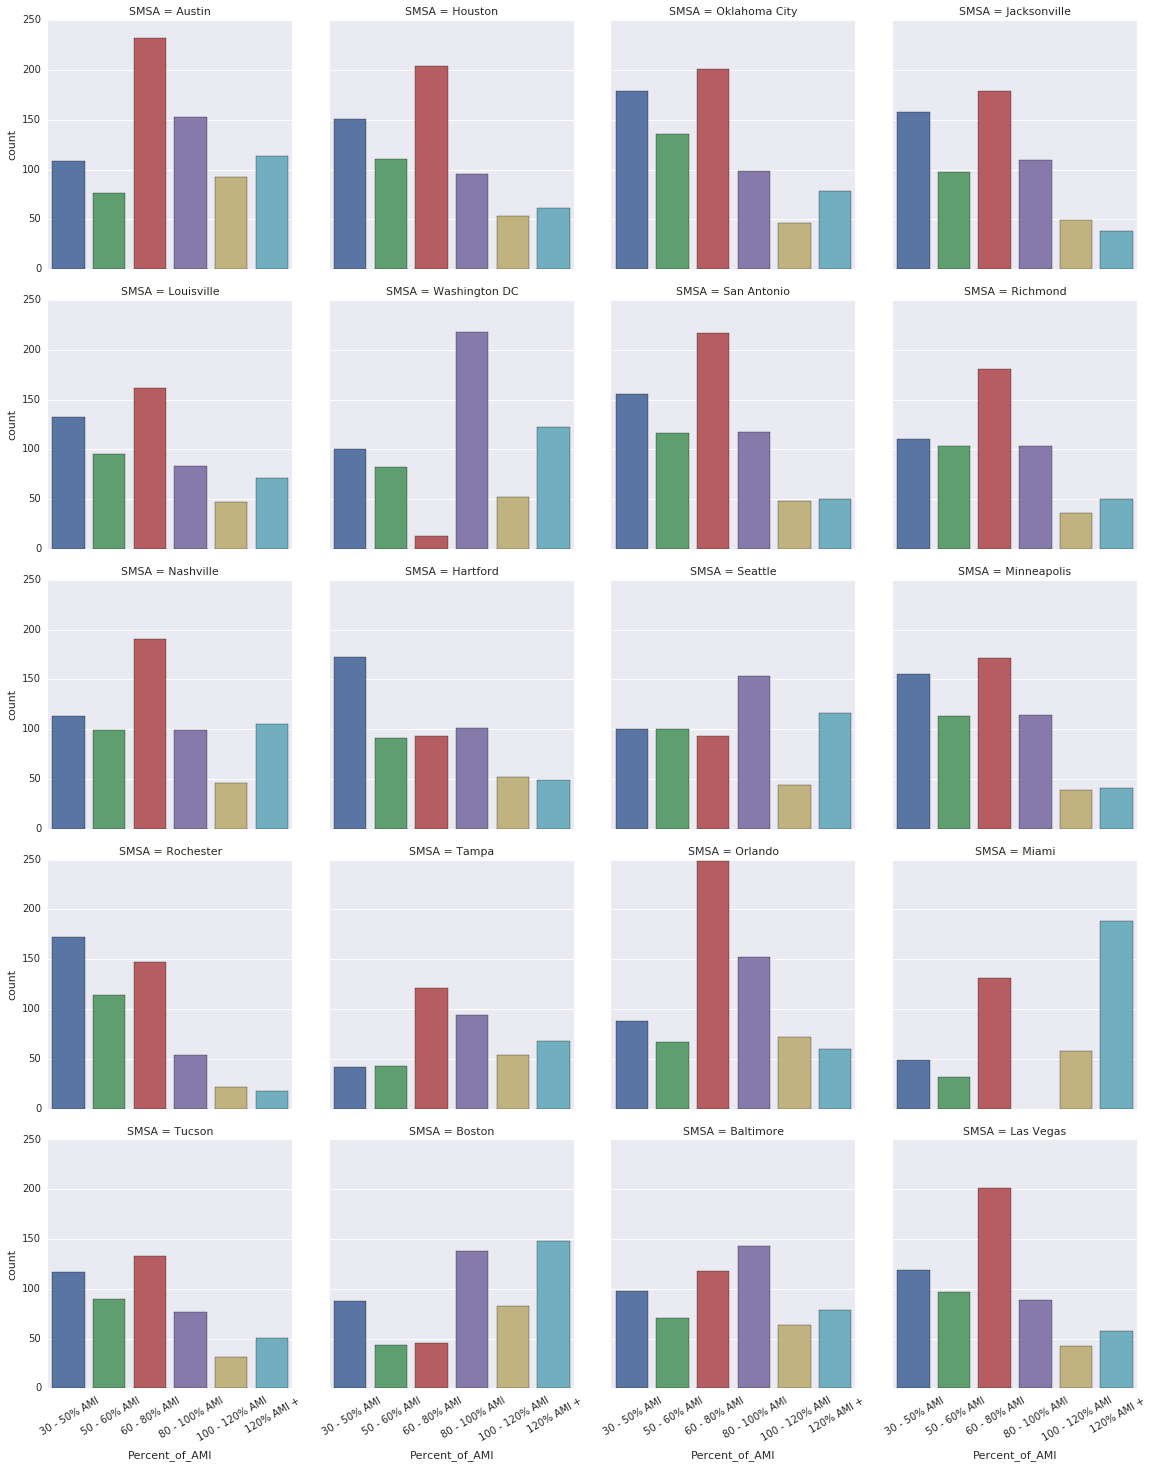

In [6]:
#ascending sort according to income category
result = df2.sort('Income_Cat')
#seaborn visualization
g = sns.factorplot(x="Percent_of_AMI", col="SMSA",col_wrap = 4,
                 data=result, kind="count", 
                size = 4, aspect = 1 )

g.set_xticklabels(rotation=30)
plt.show()



In [ ]:
# OBSERVATIONS FROM DATA
# This visualization plots the count of homeowner income in each category:
#30-50% Average Median Income, 60-80% AMI, 80-100% AMI, 100 -120%AMI, 120%AMI+ 
# From the data, we can see Oklahoma City and Rochester will be the least expensive cities to stay for 30-40 year olds.            
# Miami and Boston are the most expensive cities to stay.
